<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.164422,90.875992,3.694429,189.734842,188.055943,1.678899
1,0.0,1.0,38.253125,75.773308,-17.772721,106.253713,122.181841,-15.928128
2,0.0,2.0,82.293918,70.070071,-13.453706,148.910282,165.055629,-16.145346
3,0.0,3.0,46.345856,91.957439,-1.321235,146.982059,146.501532,0.480527
4,0.0,4.0,83.497284,48.568308,-2.258484,139.807108,145.860675,-6.053567
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,89.583240,64.190184,0.191593,163.965016,161.685823,2.279193
59996,999.0,56.0,46.934582,84.644731,9.066790,150.646103,136.706313,13.939790
59997,999.0,57.0,61.500576,78.754478,-6.566482,143.688572,146.262211,-2.573639
59998,999.0,58.0,29.965133,49.009985,-5.394100,83.581019,85.836468,-2.255449


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    85.164422  90.875992   3.694429  189.734842  188.055943   
      1.0    38.253125  75.773308 -17.772721  106.253713  122.181841   
      2.0    82.293918  70.070071 -13.453706  148.910282  165.055629   
      3.0    46.345856  91.957439  -1.321235  146.982059  146.501532   
      4.0    83.497284  48.568308  -2.258484  139.807108  145.860675   
...                ...        ...        ...         ...         ...   
999.0 55.0   89.583240  64.190184   0.191593  163.965016  161.685823   
      56.0   46.934582  84.644731   9.066790  150.646103  136.706313   
      57.0   61.500576  78.754478  -6.566482  143.688572  146.262211   
      58.0   29.965133  49.009985  -5.394100   83.581019   85.836468   
      59.0   96.450181  36.513150   0.843982  143.807313  142.907677   

                 e_hat  
rep   index             
0.0   0.0     1.678899  
      1.0   -15.928128  
      2.0   -16.145346  
      3.0     0.480527  
      4.0    -6.053567  
...                ...  
999.0 55.0    2.279193  
      56.0   13.939790  
      57.0   -2.573639  
      58.0   -2.255449  
      59.0    0.899636  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    85.164422  90.875992   3.694429  189.734842  188.055943   
      1.0    38.253125  75.773308 -17.772721  106.253713  122.181841   
      2.0    82.293918  70.070071 -13.453706  148.910282  165.055629   
      3.0    46.345856  91.957439  -1.321235  146.982059  146.501532   
      4.0    83.497284  48.568308  -2.258484  139.807108  145.860675   
...                ...        ...        ...         ...         ...   
999.0 55.0   89.583240  64.190184   0.191593  163.965016  161.685823   
      56.0   46.934582  84.644731   9.066790  150.646103  136.706313   
      57.0   61.500576  78.754478  -6.566482  143.688572  146.262211   
      58.0   29.965133  49.009985  -5.394100   83.581019   85.836468   
      59.0   96.450181  36.513150   0.843982  143.807313  142.907677   

                 e_hat  
rep   index             
0.0   0.0     1.678899  
      1.0   -15.928128  
      2.0   -16.145346  
      3.0     0.480527  
      4.0    -6.053567  
...                ...  
999.0 55.0    2.279193  
      56.0   13.939790  
      57.0   -2.573639  
      58.0   -2.255449  
      59.0    0.899636  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.164422,90.875992,3.694429,189.734842,188.055943,1.678899
1,0.0,1.0,38.253125,75.773308,-17.772721,106.253713,122.181841,-15.928128
2,0.0,2.0,82.293918,70.070071,-13.453706,148.910282,165.055629,-16.145346
3,0.0,3.0,46.345856,91.957439,-1.321235,146.982059,146.501532,0.480527
4,0.0,4.0,83.497284,48.568308,-2.258484,139.807108,145.860675,-6.053567
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,89.583240,64.190184,0.191593,163.965016,161.685823,2.279193
59996,999.0,56.0,46.934582,84.644731,9.066790,150.646103,136.706313,13.939790
59997,999.0,57.0,61.500576,78.754478,-6.566482,143.688572,146.262211,-2.573639
59998,999.0,58.0,29.965133,49.009985,-5.394100,83.581019,85.836468,-2.255449


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    85.164422  90.875992   3.694429  189.734842  188.055943   
      1.0    38.253125  75.773308 -17.772721  106.253713  122.181841   
      2.0    82.293918  70.070071 -13.453706  148.910282  165.055629   
      3.0    46.345856  91.957439  -1.321235  146.982059  146.501532   
      4.0    83.497284  48.568308  -2.258484  139.807108  145.860675   
...                ...        ...        ...         ...         ...   
999.0 55.0   89.583240  64.190184   0.191593  163.965016  161.685823   
      56.0   46.934582  84.644731   9.066790  150.646103  136.706313   
      57.0   61.500576  78.754478  -6.566482  143.688572  146.262211   
      58.0   29.965133  49.009985  -5.394100   83.581019   85.836468   
      59.0   96.450181  36.513150   0.843982  143.807313  142.907677   

                 e_hat  
rep   index             
0.0   0.0     1.678899  
      1.0   -15.928128  
      2.0   -16.145346  
      3.0     0.480527  
      4.0    -6.053567  
...                ...  
999.0 55.0    2.279193  
      56.0   13.939790  
      57.0   -2.573639  
      58.0   -2.255449  
      59.0    0.899636  

[60000 rows x 6 columns]

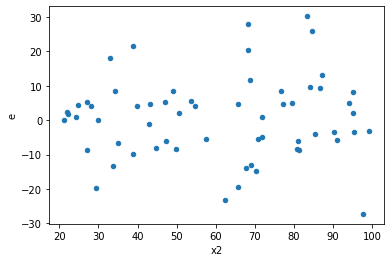

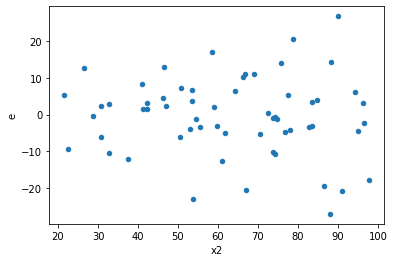

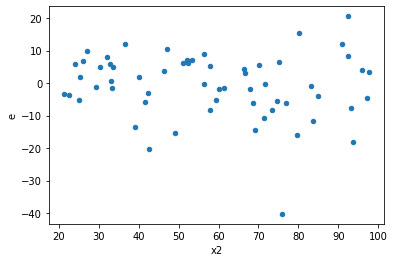

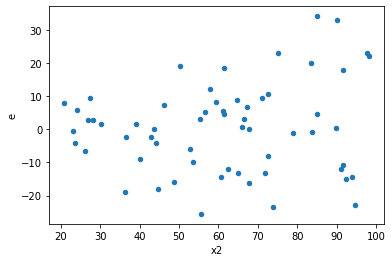

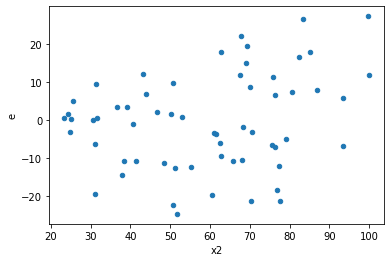

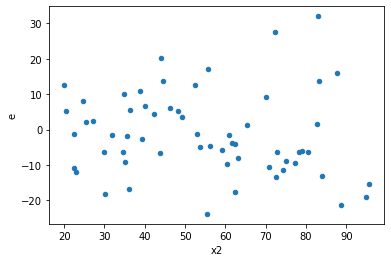

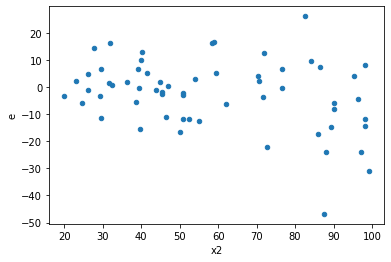

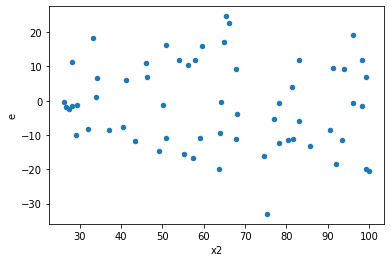

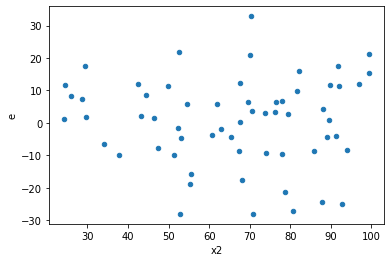

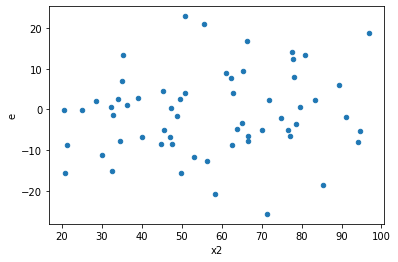

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,28.0,28.0,1609.3036334295437,3437.1495046889872,57.475129765340846,122.75533945317811,2.135799257076286,0.04918974185638669,0.9754051290718067,0.024594870928193346,Reject005=0 : Heteroscedasticity
4.0,32.0,24.0,2805.4645637395097,2123.9173453394515,87.67076761685968,88.49655605581047,1.0094191993682509,0.9951766391826797,0.5024116804086601,0.49758831959133987,Reject005=1 : Homoscedasticity
5.0,23.0,33.0,2532.865611270551,8940.895274901492,110.1245917943718,270.93622045156036,2.4602699182527843,0.017820549651900164,0.9910897251740499,0.008910274825950082,Reject005=0 : Heteroscedasticity
6.0,34.0,22.0,3963.8184003372785,2637.601503531672,116.58289412756702,119.89097743325782,1.0283753747103845,0.9650670233166259,0.5174664883416871,0.48253351165831293,Reject005=1 : Homoscedasticity
7.0,26.0,30.0,2020.8584302257552,3444.029178046302,77.72532423945212,114.8009726015434,1.4770086033719276,0.3026897760870684,0.8486551119564658,0.1513448880435342,Reject005=1 : Homoscedasticity
8.0,34.0,22.0,4128.674664234737,3813.697708844602,121.43160777160992,173.34989585657283,1.4275516814585167,0.38417679471276456,0.8079116026436177,0.19208839735638228,Reject005=1 : Homoscedasticity
9.0,36.0,20.0,5001.75605763714,5137.252460926436,138.9376682676983,256.8626230463218,1.8487615795553114,0.14635721906861265,0.9268213904656937,0.07317860953430633,Reject005=1 : Homoscedasticity
11.0,28.0,28.0,2959.442398024692,3575.5353813879647,105.69437135802471,127.69769219242731,1.2081787379184978,0.6202212716399962,0.6898893641800019,0.3101106358199981,Reject005=1 : Homoscedasticity
14.0,25.0,31.0,3483.9715407866865,4961.414068646706,139.35886163146745,160.0456151176357,1.1484423254035618,0.7074933486256274,0.6462533256871863,0.3537466743128137,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,25.0,6533.454474822892,1576.9461898438044,210.75659596202877,63.077847593752175,0.29929240081822484,0.0017246398414447095,Reject005=0 : Heteroscedasticity
1.0,29.0,27.0,3993.0883599787367,2995.4702699673785,137.6927020682323,110.94334333212512,0.8057314706276024,0.5681639973103556,Reject005=1 : Homoscedasticity
2.0,26.0,30.0,6346.497328170681,2930.460438993291,244.0960510834877,97.6820146331097,0.4001785944488701,0.020195369810203395,Reject005=0 : Heteroscedasticity
3.0,28.0,28.0,1609.3036334295437,3437.1495046889872,57.475129765340846,122.75533945317811,2.135799257076286,0.04918974185638669,Reject005=0 : Heteroscedasticity
4.0,32.0,24.0,2805.4645637395097,2123.9173453394515,87.67076761685968,88.49655605581047,1.0094191993682509,0.9951766391826797,Reject005=1 : Homoscedasticity
5.0,23.0,33.0,2532.865611270551,8940.895274901492,110.1245917943718,270.93622045156036,2.4602699182527843,0.017820549651900164,Reject005=0 : Heteroscedasticity
6.0,34.0,22.0,3963.8184003372785,2637.601503531672,116.58289412756702,119.89097743325782,1.0283753747103845,0.9650670233166259,Reject005=1 : Homoscedasticity
7.0,26.0,30.0,2020.8584302257552,3444.029178046302,77.72532423945212,114.8009726015434,1.4770086033719276,0.3026897760870684,Reject005=1 : Homoscedasticity
8.0,34.0,22.0,4128.674664234737,3813.697708844602,121.43160777160992,173.34989585657283,1.4275516814585167,0.38417679471276456,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      635
Reject005=0 : Heteroscedasticity    365
Name: Result_test, dtype: int64